[Reference](https://blog.devgenius.io/automate-your-machine-learning-development-pipeline-with-pycaret-8cd94cb20a04)

In [1]:
!pip install pycaret

     |████████████████████████████████| 301 kB 4.1 MB/s 
     |████████████████████████████████| 2.0 MB 47.9 MB/s 
     |████████████████████████████████| 1.7 MB 41.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.3 MB/s 
     |████████████████████████████████| 16.5 MB 37.1 MB/s 
     |████████████████████████████████| 114 kB 62.5 MB/s 
     |████████████████████████████████| 6.8 MB 40.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 35.6 MB/s 
     |████████████████████████████████| 261 kB 53.8 MB/s 
     |████████████████████████████████| 102 kB 11.8 MB/s 
     |████████████████████████████████| 303 kB 55.3 MB/s 
     |████████████████████████████████| 3.1 MB 36.3 MB/s 
     |█████████████████

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [5]:
from pycaret.classification import *
exp_clf101 = setup(data = dataset, target = 'default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8206,0.7652,0.3782,0.6732,0.4839,0.3857,0.4094,0.293
lightgbm,Light Gradient Boosting Machine,0.8205,0.7751,0.3782,0.6727,0.4838,0.3854,0.4091,0.465
ridge,Ridge Classifier,0.8200,0.0000,0.3561,0.6841,0.4679,0.3725,0.4015,0.058
gbc,Gradient Boosting Classifier,0.8196,0.7786,0.3590,0.6792,0.4694,0.3731,0.4007,6.929
ada,Ada Boost Classifier,0.8183,0.7729,0.3422,0.6843,0.4556,0.3610,0.3925,2.239
rf,Random Forest Classifier,0.8153,0.7614,0.3646,0.6532,0.4676,0.3666,0.3896,3.945
et,Extra Trees Classifier,0.8067,0.7346,0.3729,0.6075,0.4616,0.3520,0.3679,2.251
lr,Logistic Regression,0.7773,0.6439,0.0000,0.0000,0.0000,0.0000,0.0000,1.442
dummy,Dummy Classifier,0.7773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.029
knn,K Neighbors Classifier,0.7486,0.5986,0.1847,0.3708,0.2463,0.1155,0.1257,1.160


In [7]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8256,0.7743,0.3904,0.6919,0.4991,0.4033,0.4276
1,0.8190,0.7589,0.3503,0.6823,0.4629,0.3673,0.3969
2,0.8310,0.7796,0.4251,0.6974,0.5282,0.4326,0.4522
3,0.8119,0.7552,0.3583,0.6381,0.4589,0.3558,0.3775
4,0.8202,0.7774,0.4144,0.6513,0.5065,0.4032,0.4186
5,0.8161,0.7870,0.3503,0.6650,0.4588,0.3606,0.3876
6,0.8250,0.7424,0.3930,0.6869,0.5000,0.4033,0.4264
7,0.8190,0.7704,0.3636,0.6733,0.4722,0.3746,0.4005
8,0.8107,0.7428,0.3493,0.6390,0.4517,0.3490,0.3723
9,0.8279,0.7642,0.3877,0.7073,0.5009,0.4074,0.4343


In [10]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8292,0.7754,0.4091,0.6986,0.5160,0.4208,0.4430
1,0.8167,0.7595,0.3583,0.6634,0.4653,0.3663,0.3917
2,0.8315,0.7786,0.4439,0.6888,0.5398,0.4426,0.4586
3,0.8125,0.7570,0.3636,0.6385,0.4634,0.3600,0.3809
4,0.8196,0.7821,0.4225,0.6449,0.5105,0.4058,0.4194
5,0.8190,0.7900,0.3770,0.6651,0.4812,0.3816,0.4042
6,0.8262,0.7456,0.4037,0.6864,0.5084,0.4113,0.4327
7,0.8190,0.7717,0.3850,0.6606,0.4865,0.3858,0.4065
8,0.8095,0.7487,0.3573,0.6291,0.4558,0.3508,0.3714
9,0.8297,0.7647,0.4037,0.7056,0.5136,0.4195,0.4435


In [11]:
print(tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)


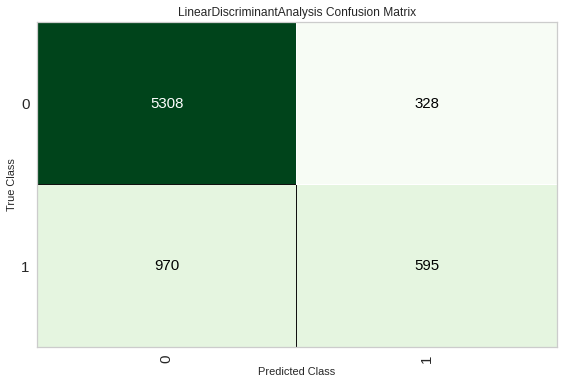

In [12]:
plot_model(tuned_lda, plot = 'confusion_matrix')

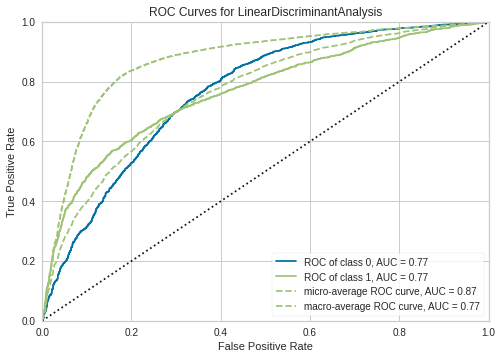

In [13]:
plot_model(tuned_lda, plot = 'auc')

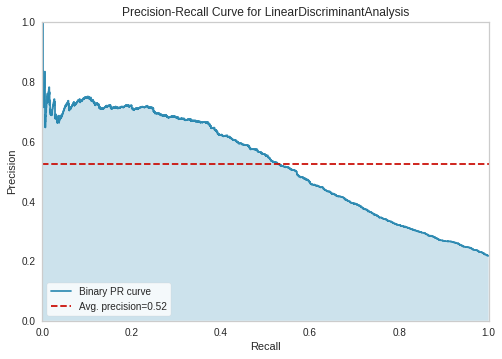

In [14]:
plot_model(tuned_lda, plot = 'pr')

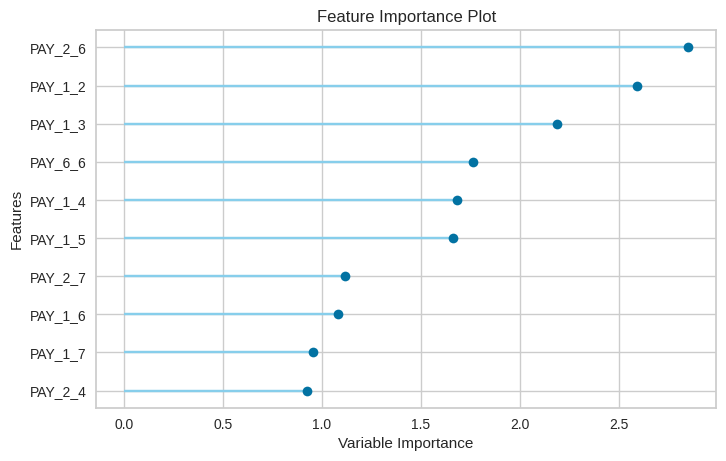

In [15]:
plot_model(tuned_lda, plot='feature')

In [16]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8197,0.7652,0.3802,0.6446,0.4783,0.378,0.3973


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,default,Label,Score
0,140000.0,35.0,88394.0,90252.0,92775.0,93606.0,95301.0,96653.0,3280.0,4270.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9329
1,40000.0,24.0,25933.0,25589.0,25234.0,24579.0,23635.0,22680.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.9743
2,50000.0,51.0,6700.0,13902.0,42835.0,8500.0,0.0,0.0,13902.0,42863.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8447
3,90000.0,29.0,6146.0,6193.0,0.0,3199.0,1888.0,0.0,6198.0,200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9250
4,50000.0,52.0,49854.0,51215.0,50144.0,10683.0,9953.0,9567.0,2500.0,1500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,220000.0,49.0,172184.0,170697.0,168041.0,163783.0,160806.0,158866.0,7583.0,7461.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9194
7197,100000.0,41.0,2427.0,1225.0,935.0,5362.0,4082.0,-75.0,935.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7068
7198,240000.0,37.0,1769.0,842.0,14015.0,0.0,1317.0,566.0,0.0,14015.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8437
7199,110000.0,32.0,68014.0,68788.0,70880.0,72403.0,73600.0,75261.0,2500.0,3200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9321


In [18]:
final_lda = finalize_model(tuned_lda)

In [19]:
unseen_predictions = predict_model(final_lda, data=data_unseen)
unseen_predictions.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.9434
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9346
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8506
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.9670
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.8537
5,140000,1,1,1,34,0,0,0,0,0,...,48699.0,5000.0,5000.0,11885.0,5000.0,3000.0,5504.0,0,0,0.9197
6,60000,2,2,1,46,0,0,0,0,0,...,27756.0,3000.0,1500.0,1500.0,1000.0,1500.0,1500.0,0,0,0.9128
7,100000,1,2,1,27,-1,2,2,0,0,...,-246.0,3166.0,0.0,1330.0,1398.0,12.0,50000.0,0,0,0.6803
8,80000,1,1,2,30,-2,-1,0,0,0,...,5380.0,504.0,500.0,1000.0,500.0,3500.0,0.0,0,0,0.9198
9,80000,2,2,1,29,0,0,2,0,0,...,11486.0,5800.0,1000.0,600.0,400.0,1000.0,0.0,0,0,0.8751


In [20]:
save_model(final_lda,'Final LDA Model 11Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='default')),
                 ('fix_perfect', Remove_100(target='default')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (